In [1]:
# import necessary libraires
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
import matplotlib.pyplot as plt
from timeit import default_timer as timer

# Twitter Keys
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# Gathering
We will gather data from three files:
- Read 'twitter-archive-enhanced.csv' and store  it in twitter_archive_enhanced
- Request 'image_predictions.tsv' and store it in image_predictions
- Downloads the tweets and store them in tweet_json

In [2]:
# read twitter-archive-enhanced.csv file and store it
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Request 'image_predictions.tsv' and store it in image_predictions
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open('image_predictions.tsv', 'wb').write(response.content)
image_predictions = pd.read_csv('image_predictions.tsv', delimiter="\t") 
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 241


Success
861: 763167063695355904
Success
862: 763103485927849985
Success
863: 762699858130116608
Success
864: 762471784394268675
Success
865: 762464539388485633
Success
866: 762316489655476224
Success
867: 762035686371364864
Success
868: 761976711479193600
Success
869: 761750502866649088
Success
870: 761745352076779520
Success
871: 761672994376806400
Success
872: 761599872357261312
Success
873: 761371037149827077
Success
874: 761334018830917632
Success
875: 761292947749015552
Success
876: 761227390836215808
Success
877: 761004547850530816
Success
878: 760893934457552897
Success
879: 760656994973933572
Success
880: 760641137271070720
Success
881: 760539183865880579
Success
882: 760521673607086080
Success
883: 760290219849637889
Success
884: 760252756032651264
Success
885: 760190180481531904
Success
886: 760153949710192640
Success
887: 759943073749200896
Success
888: 759923798737051648
Success
889: 759846353224826880
Success
890: 759793422261743616
Success
891: 759566828574212096
Fail
892

Success
1114: 733109485275860992
Success
1115: 732732193018155009
Success
1116: 732726085725589504
Success
1117: 732585889486888962
Success
1118: 732375214819057664
Success
1119: 732005617171337216
Success
1120: 731285275100512256
Success
1121: 731156023742988288
Success
1122: 730924654643314689
Success
1123: 730573383004487680
Success
1124: 730427201120833536
Success
1125: 730211855403241472
Success
1126: 730196704625098752
Success
1127: 729854734790754305
Success
1128: 729838605770891264
Success
1129: 729823566028484608
Success
1130: 729463711119904772
Success
1131: 729113531270991872
Success
1132: 728986383096946689
Success
1133: 728760639972315136
Success
1134: 728751179681943552
Success
1135: 728653952833728512
Success
1136: 728409960103686147
Success
1137: 728387165835677696
Success
1138: 728046963732717569
Success
1139: 728035342121635841
Success
1140: 728015554473250816
Success
1141: 727685679342333952
Success
1142: 727644517743104000
Success
1143: 727524757080539137
Success
11

Success
1363: 703041949650034688
Success
1364: 702932127499816960
Success
1365: 702899151802126337
Success
1366: 702684942141153280
Success
1367: 702671118226825216
Success
1368: 702598099714314240
Success
1369: 702539513671897089
Success
1370: 702332542343577600
Success
1371: 702321140488925184
Success
1372: 702276748847800320
Success
1373: 702217446468493312
Success
1374: 701981390485725185
Success
1375: 701952816642965504
Success
1376: 701889187134500865
Success
1377: 701805642395348998
Success
1378: 701601587219795968
Success
1379: 701570477911896070
Success
1380: 701545186879471618
Success
1381: 701214700881756160
Success
1382: 700890391244103680
Success
1383: 700864154249383937
Success
1384: 700847567345688576
Success
1385: 700796979434098688
Success
1386: 700747788515020802
Success
1387: 700518061187723268
Success
1388: 700505138482569216
Success
1389: 700462010979500032
Success
1390: 700167517596164096
Success
1391: 700151421916807169
Success
1392: 700143752053182464
Success
13

Success
1612: 685325112850124800
Success
1613: 685321586178670592
Success
1614: 685315239903100929
Success
1615: 685307451701334016
Success
1616: 685268753634967552
Success
1617: 685198997565345792
Success
1618: 685169283572338688
Success
1619: 684969860808454144
Success
1620: 684959798585110529
Success
1621: 684940049151070208
Success
1622: 684926975086034944
Success
1623: 684914660081053696
Success
1624: 684902183876321280
Success
1625: 684880619965411328
Success
1626: 684830982659280897
Success
1627: 684800227459624960
Success
1628: 684594889858887680
Success
1629: 684588130326986752
Success
1630: 684567543613382656
Success
1631: 684538444857667585
Success
1632: 684481074559381504
Success
1633: 684460069371654144
Success
1634: 684241637099323392
Success
1635: 684225744407494656
Success
1636: 684222868335505415
Success
1637: 684200372118904832
Success
1638: 684195085588783105
Success
1639: 684188786104872960
Success
1640: 684177701129875456
Success
1641: 684147889187209216
Success
16

Rate limit reached. Sleeping for: 347


Success
1761: 678708137298427904
Success
1762: 678675843183484930
Success
1763: 678643457146150913
Success
1764: 678446151570427904
Success
1765: 678424312106393600
Success
1766: 678410210315247616
Success
1767: 678399652199309312
Success
1768: 678396796259975168
Success
1769: 678389028614488064
Success
1770: 678380236862578688
Success
1771: 678341075375947776
Success
1772: 678334497360859136
Success
1773: 678278586130948096
Success
1774: 678255464182861824
Success
1775: 678023323247357953
Success
1776: 678021115718029313
Success
1777: 677961670166224897
Success
1778: 677918531514703872
Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
17

Success
2010: 672254177670729728
Success
2011: 672248013293752320
Success
2012: 672245253877968896
Success
2013: 672239279297454080
Success
2014: 672231046314901505
Success
2015: 672222792075620352
Success
2016: 672205392827572224
Success
2017: 672169685991993344
Success
2018: 672160042234327040
Success
2019: 672139350159835138
Success
2020: 672125275208069120
Success
2021: 672095186491711488
Success
2022: 672082170312290304
Success
2023: 672068090318987265
Success
2024: 671896809300709376
Success
2025: 671891728106971137
Success
2026: 671882082306625538
Success
2027: 671879137494245376
Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
20

Success
2259: 667724302356258817
Success
2260: 667550904950915073
Success
2261: 667550882905632768
Success
2262: 667549055577362432
Success
2263: 667546741521195010
Success
2264: 667544320556335104
Success
2265: 667538891197542400
Success
2266: 667534815156183040
Success
2267: 667530908589760512
Success
2268: 667524857454854144
Success
2269: 667517642048163840
Success
2270: 667509364010450944
Success
2271: 667502640335572993
Success
2272: 667495797102141441
Success
2273: 667491009379606528
Success
2274: 667470559035432960
Success
2275: 667455448082227200
Success
2276: 667453023279554560
Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
22

In [4]:
#Downloads the tweets and store them in tweet_json
df_temp = pd.read_json('tweet_json.txt', lines=True)
tweet_json = df_temp[["id", "retweet_count", "favorite_count"]]
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,7489,35461
1,892177421306343426,5557,30692
2,891815181378084864,3681,23088
3,891689557279858688,7665,38754
4,891327558926688256,8267,37032


# Assessing 
We will assess data visually and programatically

## 1st Visually Assesing

In [5]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,7489,35461
1,892177421306343426,5557,30692
2,891815181378084864,3681,23088
3,891689557279858688,7665,38754
4,891327558926688256,8267,37032
...,...,...,...
2325,666049248165822465,40,96
2326,666044226329800704,125,264
2327,666033412701032449,39,109
2328,666029285002620928,41,119


## 2nd  Programatically Assesing

In [8]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive_enhanced.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [10]:
odd_numerator = twitter_archive_enhanced.index[twitter_archive_enhanced.rating_numerator>14].tolist()
for x in odd_numerator:
    print(x, twitter_archive_enhanced.rating_numerator[x],twitter_archive_enhanced.text[x])

55 17 @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
188 420 @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189 666 @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
285 15 RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI
290 182 @markhoppus 182/10
291 15 @bragg6of8 @Andy_Pace_ we are still looking for the first 15/10
313 960 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
340 75 RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
433 84 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516 24 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clickin

In [11]:
print(twitter_archive_enhanced.doggo.value_counts())
print(twitter_archive_enhanced.floofer.value_counts())
print(twitter_archive_enhanced.pupper.value_counts())
print(twitter_archive_enhanced.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_predictions.jpg_url.duplicated().sum()

66

In [14]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [15]:
tweet_json.id.duplicated().sum()

0

## Quality Issues:
1. twitter_archive_enhanced: href tags in 'source'.
2. twitter_archive_enhanced: timestamp not in datetime format 
3. twitter_archive_enhanced: there are duplicates and we can now them from retweeted_status_user_id
4. twitter_archive_enhanced: We could drop these columns as we will not use them (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id)
5. twitter_archive_enhanced: Name column has invalid names like 'a', 'an'.
6. twitter_archive_enhanced: Name column contain "None" instead of NaN.
7. twitter_archive_enhanced: Contains wrong values and some of them are float numbers
8. image_predictions: p1, p2, and p3 contain underscores instead of spaces and some are upper and others are lower cases
9. image_predictions: Many prediction columns with differnet algorithms 

## Tidiness Issues:
1.	twitter_archive_enhanced: Erroneous datatypes (doggo, floofer, pupper and puppo columns)
2.	All tables should be part of one dataset

# Clean

We will fix all the issues now, first we will fix the **quality issues**

In [16]:
# We will make a copy from the each dataset
archive_copy = twitter_archive_enhanced
predictions_copy = image_predictions
tweet_json_copy = tweet_json

### 1. for "twitter_archive_enhanced: href tags in 'source'." 
We will remove the 'a' tags from the hyperlinks

In [17]:
link_new = []
for link in archive_copy.source:
    start=link.find('"')+1
    end = link[start:].find('"')
    link_new.append(link[start:end+start])
archive_copy.source=link_new
archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. for "twitter_archive_enhanced: timestamp not in datetime format" 
We will change timesatmp type to datetime

In [18]:
archive_copy.timestamp = pd.to_datetime(archive_copy.timestamp)
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### 3. & 4. for "twitter_archive_enhanced: there are duplicates and we can now them from retweeted_status_user_id" and "twitter_archive_enhanced: We could drop these columns as we will not use them (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)"

We will remove the duplicates any field that has 'retweeted_status_user_id' not NAN and then we will remove "reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id" as there wil be no need for them

In [19]:
archive_copy = archive_copy[pd.isnull(archive_copy['retweeted_status_id'])]
print(archive_copy.retweeted_status_id.isnull().sum())
archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)
archive_copy.info()

2175
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object      

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 5. & 6 for " twitter_archive_enhanced: Name column has invalid names like 'a', 'an'" and "twitter_archive_enhanced: Some columns contain "None" instead of NaN"
We will change all these typos into NAN

In [20]:
#names usually start with a capital letter so we will check for this at first
odd_names=[]
for name in archive_copy.name:
    if name[0].islower() :
        odd_names.append(name)
print(odd_names)
print(len(odd_names))

['such', 'a', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'a', 'very', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']
104


In [21]:
#Since they are only 109 tweet we will replace them with NAN
odd_names=list(set(odd_names))
archive_copy.name.replace(odd_names, np.nan, inplace = True)
archive_copy.name.replace('None', np.nan, inplace = True)
#test check if the odd_names or None are in the 'name' column
odd_names.append('None')
x = pd.Series(archive_copy.name)
odd_names in x.unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-21-93a29ca243c1>:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  odd_names in x.unique()


False

### 7. for "twitter_archive_enhanced: Contains wrong values for numerator and some of them are float numbers" 
Get numerator and denominators from text column

In [22]:
# change rating_numerator and rating_denominator to floats
archive_copy.rating_numerator = archive_copy.rating_numerator.astype(float)
archive_copy.rating_denominator = archive_copy.rating_denominator.astype(float)
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   float64            
 9   name                   1391 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
# Create empty column for rating
archive_copy.rating=np.nan
archive_copy.rating = archive_copy.text.apply(lambda x: re.findall(r"\d+\.?\d*\/\d+", x)[0])

In [24]:
# Check to see if the Regular Expression is working well
archive_copy.rating.value_counts()

12/10       500
10/10       442
11/10       425
13/10       307
9/10        155
8/10         98
7/10         52
14/10        43
5/10         34
6/10         32
3/10         19
4/10         15
2/10          9
1/10          7
4/20          2
420/10        2
0/10          2
84/70         1
666/10        1
165/150       1
20/16         1
15/10         1
9/11          1
1/2           1
99/90         1
121/110       1
1776/10       1
007/10        1
24/7          1
204/170       1
80/80         1
11.27/10      1
144/120       1
9.75/10       1
45/50         1
88/80         1
13.5/10       1
960/00        1
11.26/10      1
9.5/10        1
182/10        1
60/50         1
44/40         1
17/10         1
50/50         1
7/11          1
143/130       1
11/15         1
Name: text, dtype: int64

In [25]:
archive_copy.rating_numerator, archive_copy.rating_denominator = archive_copy.rating.str.split('/', 1).str
#test for float number we know
archive_copy.rating_numerator[1712] 

<ipython-input-25-9216ad29112d>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  archive_copy.rating_numerator, archive_copy.rating_denominator = archive_copy.rating.str.split('/', 1).str


'11.26'

### 8. for "image_predictions: p1, p2, and p3 contain underscores instead of spaces and some are upper and others are lower cases " 
We will replace underscores with labels and turn all text into title

In [26]:
predictions_copy.p1 = predictions_copy.p1.str.replace('_',' ')
predictions_copy.p2 = predictions_copy.p2.str.replace('_',' ')
predictions_copy.p3 = predictions_copy.p3.str.replace('_',' ')
predictions_copy.p1 = predictions_copy.p1.str.title()
predictions_copy.p2 = predictions_copy.p2.str.title()
predictions_copy.p3 = predictions_copy.p3.str.title()
# test
predictions_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


Now we fix the **Tidiness Issues**

### 1. for "twitter_archive_enhanced: Erroneous datatypes (doggo, floofer, pupper and puppo)"
First change None values into NAN, then merge above columns in one call called stages

In [27]:
#Change None values into NAN in (doggo, floofer, pupper and puppo) columns
archive_copy.doggo.replace('None', np.nan, inplace = True)
archive_copy.floofer.replace('None', np.nan, inplace = True)
archive_copy.pupper.replace('None', np.nan, inplace = True)
archive_copy.puppo.replace('None', np.nan, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [28]:
columns = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name']
combine_col = ['doggo', 'floofer', 'pupper', 'puppo']
archive_copy = pd.melt(archive_copy, id_vars = columns, value_vars = combine_col, var_name = 'stages', value_name = 'stage')
archive_copy = archive_copy.drop('stages', 1)
#drop dulpicates
archive_copy = archive_copy.drop_duplicates()

In [29]:
archive_copy.stage.value_counts()
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 7430
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2531 non-null   int64              
 1   in_reply_to_status_id  87 non-null     float64            
 2   in_reply_to_user_id    87 non-null     float64            
 3   timestamp              2531 non-null   datetime64[ns, UTC]
 4   source                 2531 non-null   object             
 5   text                   2531 non-null   object             
 6   expanded_urls          2467 non-null   object             
 7   rating_numerator       2531 non-null   object             
 8   rating_denominator     2531 non-null   object             
 9   name                   1579 non-null   object             
 10  stage                  356 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(

### 2. for "All tables should be part of one dataset"
We will merge all tables by tweet_id

In [30]:
tweet_json_copy= tweet_json_copy.rename(columns={'id': 'tweet_id'})
temp = pd.merge(left=archive_copy, right=predictions_copy, left_on='tweet_id', right_on='tweet_id', how='inner')
dog_tweets= pd.merge(left=temp, right=tweet_json_copy, left_on='tweet_id', right_on='tweet_id', how='inner')
dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 0 to 2301
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2302 non-null   int64              
 1   in_reply_to_status_id  26 non-null     float64            
 2   in_reply_to_user_id    26 non-null     float64            
 3   timestamp              2302 non-null   datetime64[ns, UTC]
 4   source                 2302 non-null   object             
 5   text                   2302 non-null   object             
 6   expanded_urls          2302 non-null   object             
 7   rating_numerator       2302 non-null   object             
 8   rating_denominator     2302 non-null   object             
 9   name                   1523 non-null   object             
 10  stage                  316 non-null    object             
 11  jpg_url                2302 non-null   object           

In [31]:
dog_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,7489,35461
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5557,30692
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3681,23088
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,7665,38754
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,8267,37032


### 9. for "image_predictions: Many prediction columns with differnet algorithms" 
We can drop all the prediction columns and create only

In [37]:
dog_type = []
pred_confidence = []
#p2	p2_conf	p2_dog
def type_pred (dog_tweets):
    d_type = np.nan
    d_conf=0.00
    if not(dog_tweets.p1_dog and  dog_tweets.p2_dog and dog_tweets.p3_dog):
        d_type = np.nan
        d_conf=0.0
    else:
        if dog_tweets.p1_dog:
            d_type = dog_tweets.p1
            d_conf = dog_tweets.p1_conf
        if dog_tweets.p2_dog:
            if dog_tweets.p2_conf > d_conf:
                d_type = dog_tweets.p2
                d_conf = dog_tweets.p2_conf                
        if dog_tweets.p3_dog:
            if dog_tweets.p3_conf > d_conf:
                d_type = dog_tweets.p3
                d_pred = dog_tweets.p3_conf
    dog_type.append(d_type)
    pred_confidence.append(d_conf)  
    
dog_tweets.apply(type_pred, axis=1)
dog_tweets['dog_type'] = dog_type
dog_tweets['confidence_percentage'] = pred_confidence
dog_tweets = dog_tweets.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)
dog_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,retweet_count,favorite_count,dog_type,confidence_percentage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,7489,35461,NaN,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,5557,30692,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3681,23088,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,7665,38754,NaN,0.000000
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,8267,37032,Basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,40,96,Miniature Pinscher,0.560311
2298,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,125,264,Rhodesian Ridgeback,0.408143
2299,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,39,109,German Shepherd,0.596461
2300,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,41,119,Redbone,0.506826


# Storing Data in CSV File

In [38]:
dog_tweets.to_csv('twitter_archive_master.csv')

# Insightes & visualization

We will try to get the following insightes:
1. The Most common dog type
2. The most common dog stage
3. The relation between dog type and favorite_count
4. the relation between retweet_count and favorite_count.

### 1.The Most common dog type

In [39]:
dog_tweets.dog_type.value_counts()

Golden Retriever           149
Labrador Retriever          88
Pembroke                    87
Chihuahua                   52
Pug                         46
                          ... 
Appenzeller                  1
Silky Terrier                1
Scotch Terrier               1
Wire-Haired Fox Terrier      1
Entlebucher                  1
Name: dog_type, Length: 110, dtype: int64

**The most common type is 'Golden Retriever'**

### 2.The most common dog stage

In [40]:
dog_tweets.stage.value_counts()

pupper     212
doggo       73
puppo       23
floofer      8
Name: stage, dtype: int64

**The most common dog stage is 'pupper'**

### 3. The dog type and retweet_count

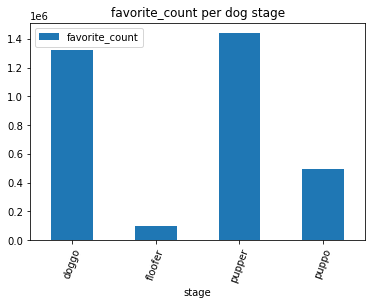

In [61]:
x = dog_tweets.groupby(["stage"]).favorite_count.sum().reset_index()
x.plot.bar(x="stage", y="favorite_count", rot=70, title="favorite_count per dog stage");
plt.savefig('Favorite_per_stage.png', bbox_inches='tight')

**The most stage that was favorite to users is 'pupper'**

### 4. The relation between retweet_count and favorite_count.

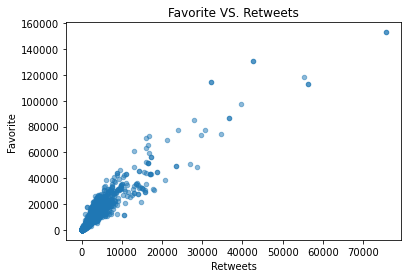

In [62]:
dog_tweets.plot(kind='scatter',x='retweet_count',y='favorite_count', alpha = 0.5)
plt.xlabel('Retweets')
plt.ylabel('Favorite')
plt.title('Favorite VS. Retweets')
plt.savefig('Favorite VS. Retweets.png', bbox_inches='tight')

**Retweets counts are positively correlated with Favorite counts**